# **LGM-VIP Data Science Internship Programme**

# **Beginner Level Task-2**
# **Stock Market Prediction and Forecasting using Stacked LSTM** 

In [1]:
# Importing necessary libraries for our task.
import numpy as np
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import math 
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Reading the csv file:**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.shape

(2035, 8)

Text(0, 0.5, 'Close')

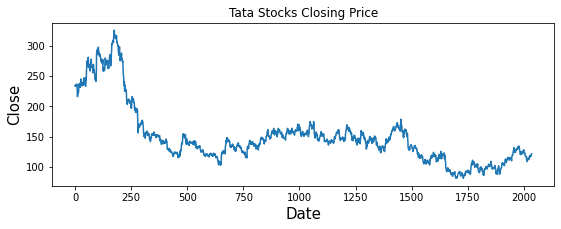

In [5]:
plt.figure(figsize = (9,3))
plt.title('Tata Stocks Closing Price')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)


Now, we store the target attribute in the 'Close' Column.

In [6]:
data_close = data.reset_index()['Close']
data_close.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

From the original dataset, we can tell that each of our target value are in close proximity to one another. So, we will use MinMaxScaler to scale down all the target variables in the range of (0, 1) for the ease of computation.

In [7]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Now, we split our data into Training data (80%) and Testing data (20%)

In [8]:
train_size = int(len(data_close) * 0.80)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0 : train_size, :], data_close[train_size : len(data_close), : 1]

In [9]:
train_size,test_size

(1628, 407)

In [10]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1435866 ],
       [0.13419118],
       [0.1431781 ]])

We got a Time Series Dataset.

---
Now we are going to link the values of datasets to each like

---
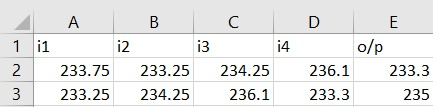


In [11]:
def create_dataset(dataset, time_step = 1):
  X_data, Y_data = [], []
  for i in range(len(dataset) - time_step - 1):
	  a = dataset[i : (i + time_step), 0] 
	  X_data.append(a)
	  Y_data.append(dataset[i + time_step, 0])
  return np.array(X_data), np.array(Y_data)

Now I am fixing the step size value as 100

In [12]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [13]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1527, 100) (1527,)
(306, 100) (306,)


Reshapping the X_train and X_test dataframe

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

# **Create the Stacked LSTM model**

In [15]:
lst = Sequential()
lst.add(LSTM(50,return_sequences = True, input_shape = (100, 1)))
lst.add(LSTM(50, return_sequences = True))
lst.add(LSTM(50))
lst.add(Dense(1))
lst.compile(loss = 'mean_squared_error', optimizer='adam')

In [16]:
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
lst.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
24/24 [==============================] - 10s 216ms/step - loss: 0.0180 - val_loss: 0.0040
Epoch 2/100
24/24 [==============================] - 4s 170ms/step - loss: 0.0021 - val_loss: 7.1883e-04
Epoch 3/100
24/24 [==============================] - 4s 164ms/step - loss: 0.0015 - val_loss: 7.4690e-04
Epoch 4/100
24/24 [==============================] - 4s 163ms/step - loss: 0.0014 - val_loss: 6.2006e-04
Epoch 5/100
24/24 [==============================] - 4s 166ms/step - loss: 0.0013 - val_loss: 6.0638e-04
Epoch 6/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0013 - val_loss: 7.0508e-04
Epoch 7/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0012 - val_loss: 6.1960e-04
Epoch 8/100
24/24 [==============================] - 4s 165ms/step - loss: 0.0010 - val_loss: 5.6547e-04
Epoch 9/100
24/24 [==============================] - 4s 168ms/step - loss: 9.8482e-04 - val_loss: 6.6033e-04
Epoch 10/100
24/24 [==============================] - 

**Prediction**

In [18]:
train_predict = lst.predict(X_train)
test_predict = lst.predict(X_test)

Reversing the MinMax Scaler

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Trained Data RMSE

In [20]:
math.sqrt(mean_squared_error(Y_train, train_predict))

159.0823351442767

Tested Data RMSE

In [21]:
math.sqrt(mean_squared_error(Y_test,test_predict))

106.77228702376551

Plotting the Predictions

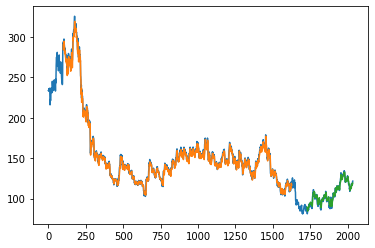

In [22]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

# Future Prediction


In [23]:
x_inum_pyut=test_data[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

In [24]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

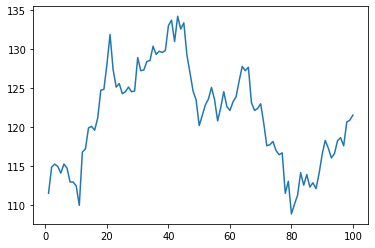

In [25]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]))

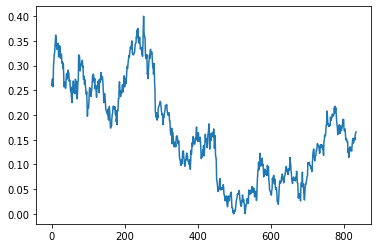

In [26]:
data_merge = data_close.tolist()
plt.plot(data_merge[1200 : ])